<a href="https://colab.research.google.com/github/ahmdriffai/Aplikasi-Login/blob/main/text_classification_submission_dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# studi kasus analisis sentimen reviewer mcdonals store

In [1]:
# setting kagle api
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ # Using Kaggle's beta API
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
# download dataset
!kaggle datasets download -d nelgiriyewithana/mcdonalds-store-reviews

  0% 0.00/1.78M [00:00<?, ?B/s]
100% 1.78M/1.78M [00:00<00:00, 198MB/s]


In [13]:
# unzip dataset
import zipfile, os

zip_ref = zipfile.ZipFile('mcdonalds-store-reviews.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

In [69]:
# make datafram from dataset
import pandas as pd

df = pd.read_csv('McDonald_s_Reviews.csv',encoding='latin-1')
df[['rating']].head()

,rating
0,1 star
1,4 stars
2,1 star
3,5 stars
4,1 star


In [33]:
# clean data
data = df.drop(['reviewer_id', 'store_name', 'category', 'store_address','longitude', 'rating_count', 'review_time'], axis=1)
end_data = data.drop(data.columns[0], axis=1)
end_data.head()

,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star


In [53]:
!pip install --user -U nltk
# Menghilangkan stopwords.
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
end_data['tokenized'] = end_data.apply(lambda x: tokenize(x['review']), axis=1)
end_data[['review', 'tokenized']].head()

,review,tokenized
0,Why does it look like someone spit on my food?...,"[Why, does, it, look, like, someone, spit, on,..."
1,It'd McDonalds. It is what it is as far as the...,"[It, McDonalds, It, is, what, it, is, as, far,..."
2,Made a mobile order got to the speaker and che...,"[Made, a, mobile, order, got, to, the, speaker..."
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,"[My, mc, Crispy, chicken, sandwich, was, custo..."
4,"I repeat my order 3 times in the drive thru, a...","[I, repeat, my, order, times, in, the, drive, ..."


In [57]:
# Stopword removal

def remove_stopwords(tokenized_column):
    """Return a list of tokens with English stopwords removed.

    Args:
        column: Pandas dataframe column of tokenized data from tokenize()

    Returns:
        tokens (list): Tokenized list with stopwords removed.

    """
    stops = set(nltk.corpus.stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [61]:
end_data['stopwords_removed'] = end_data.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
end_data[['review', 'stopwords_removed']].head()

,review,stopwords_removed
0,Why does it look like someone spit on my food?...,"[Why, look, like, someone, spit, food, I, norm..."
1,It'd McDonalds. It is what it is as far as the...,"[It, McDonalds, It, far, food, atmosphere, go,..."
2,Made a mobile order got to the speaker and che...,"[Made, mobile, order, got, speaker, checked, L..."
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,"[My, mc, Crispy, chicken, sandwich, customer, ..."
4,"I repeat my order 3 times in the drive thru, a...","[I, repeat, order, times, drive, thru, still, ..."


In [62]:
from nltk.stem.porter import PorterStemmer

# Stemming
def apply_stemming(tokenized_column):
    """Return a list of tokens with Porter stemming applied.

    Args:
        column: Pandas dataframe column of tokenized data with stopwords removed.

    Returns:
        tokens (list): Tokenized list with words Porter stemmed.

    """

    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokenized_column]

In [64]:
end_data['porter_stemmed'] = end_data.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
end_data[['review', 'porter_stemmed']].head()

,review,porter_stemmed
0,Why does it look like someone spit on my food?...,"[whi, look, like, someon, spit, food, i, norma..."
1,It'd McDonalds. It is what it is as far as the...,"[it, mcdonald, it, far, food, atmospher, go, t..."
2,Made a mobile order got to the speaker and che...,"[made, mobil, order, got, speaker, check, line..."
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,"[my, mc, crispi, chicken, sandwich, custom, se..."
4,"I repeat my order 3 times in the drive thru, a...","[i, repeat, order, time, drive, thru, still, m..."


In [65]:
def rejoin_words(tokenized_column):
    """Rejoins a tokenized word list into a single string.

    Args:
        tokenized_column (list): Tokenized column of words.

    Returns:
        string: Single string of untokenized words.
    """

    return ( " ".join(tokenized_column))

In [67]:
end_data['review_clean'] = end_data.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
end_data[['review', 'review_clean']].head()

,review,review_clean
0,Why does it look like someone spit on my food?...,whi look like someon spit food i normal transa...
1,It'd McDonalds. It is what it is as far as the...,it mcdonald it far food atmospher go the staff...
2,Made a mobile order got to the speaker and che...,made mobil order got speaker check line move i...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,my mc crispi chicken sandwich custom servic qu...
4,"I repeat my order 3 times in the drive thru, a...",i repeat order time drive thru still manag mes...


In [119]:
# membuat label

labels = []
for index, row in end_data.iterrows():
  ratings = row['rating'].removesuffix('s')
  rating = ratings.replace(" star", "")
  # print(ratings)
  if int(rating) > 3:
    labels.append(1)
  else:
    labels.append(0)

end_data['label'] = labels
end_data.head(15)

,review,rating,tokenized,stopwords_removed,porter_stemmed,review_clean,label
0,Why does it look like someone spit on my food?...,1 star,"[Why, does, it, look, like, someone, spit, on,...","[Why, look, like, someone, spit, food, I, norm...","[whi, look, like, someon, spit, food, i, norma...",whi look like someon spit food i normal transa...,0
1,It'd McDonalds. It is what it is as far as the...,4 stars,"[It, McDonalds, It, is, what, it, is, as, far,...","[It, McDonalds, It, far, food, atmosphere, go,...","[it, mcdonald, it, far, food, atmospher, go, t...",it mcdonald it far food atmospher go the staff...,1
2,Made a mobile order got to the speaker and che...,1 star,"[Made, a, mobile, order, got, to, the, speaker...","[Made, mobile, order, got, speaker, checked, L...","[made, mobil, order, got, speaker, check, line...",made mobil order got speaker check line move i...,0
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,"[My, mc, Crispy, chicken, sandwich, was, custo...","[My, mc, Crispy, chicken, sandwich, customer, ...","[my, mc, crispi, chicken, sandwich, custom, se...",my mc crispi chicken sandwich custom servic qu...,1
4,"I repeat my order 3 times in the drive thru, a...",1 star,"[I, repeat, my, order, times, in, the, drive, ...","[I, repeat, order, times, drive, thru, still, ...","[i, repeat, order, time, drive, thru, still, m...",i repeat order time drive thru still manag mes...,0
5,I work for door dash and they locked us all ou...,1 star,"[I, work, for, door, dash, and, they, locked, ...","[I, work, door, dash, locked, us, wait, long, ...","[i, work, door, dash, lock, us, wait, long, li...",i work door dash lock us wait long line reason...,0
6,If I could give this location a zero on custo...,1 star,"[If, I, could, give, this, location, a, zero, ...","[If, I, could, give, location, zero, customer,...","[if, i, could, give, locat, zero, custom, serv...",if i could give locat zero custom servic i wou...,0
7,Came in and ordered a Large coffee w/no ice. T...,1 star,"[Came, in, and, ordered, a, Large, coffee, ice...","[Came, ordered, Large, coffee, ice, They, hand...","[came, order, larg, coffe, ice, they, hand, cu...",came order larg coffe ice they hand cup less h...,0
8,Went thru drive thru. Ordered. Getting home no...,1 star,"[Went, thru, drive, thru, Ordered, Getting, ho...","[Went, thru, drive, thru, Ordered, Getting, ho...","[went, thru, drive, thru, order, get, home, no...",went thru drive thru order get home notic piec...,0
9,"I'm not really a huge fan of fast food, but I ...",4 stars,"[I, not, really, a, huge, fan, of, fast, food,...","[I, really, huge, fan, fast, food, I, teenage,...","[i, realli, huge, fan, fast, food, i, teenag, ...",i realli huge fan fast food i teenag daughter ...,1


In [120]:
data_set = end_data[['review_clean','label']]
data_set.tail()

,review_clean,label
33391,they treat badli,0
33392,the servic good,1
33393,to remov hunger enough,1
33394,it good late becom expens,1
33395,took good care,1


In [121]:
# init dataset
review = data_set['review_clean'].values
label = data_set['label'].values

In [122]:
# split data to train and validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(review, label, test_size=0.2)

In [172]:
# make tokkenizer and sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x_train)

sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=20)
padded_test = pad_sequences(sekuens_test, maxlen=20)

In [173]:
# make model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [176]:
# make callback

ACC_THRESHOLD = 0.98
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > ACC_THRESHOLD and logs.get('val_acc') > ACC_THRESHOLD):
            print("\nReached accuracy, so stopping training!!")
            self.model.stop_training = True

In [177]:
# train_data
callback = myCallback()
num_epochs = 30
hist = model.fit(padded_latih, y_train, epochs=num_epochs, validation_data=(padded_test, y_test), verbose=2, callbacks=[callback])

Epoch 1/30
835/835 - 11s - loss: 0.2710 - acc: 0.8903 - val_loss: 0.3332 - val_acc: 0.8705 - 11s/epoch - 13ms/step
Epoch 2/30
835/835 - 10s - loss: 0.2441 - acc: 0.9005 - val_loss: 0.3333 - val_acc: 0.8648 - 10s/epoch - 12ms/step
Epoch 3/30
835/835 - 10s - loss: 0.2204 - acc: 0.9090 - val_loss: 0.3379 - val_acc: 0.8696 - 10s/epoch - 12ms/step
Epoch 4/30
835/835 - 10s - loss: 0.1979 - acc: 0.9175 - val_loss: 0.3652 - val_acc: 0.8719 - 10s/epoch - 12ms/step
Epoch 5/30
835/835 - 10s - loss: 0.1792 - acc: 0.9257 - val_loss: 0.4270 - val_acc: 0.8684 - 10s/epoch - 13ms/step
Epoch 6/30
835/835 - 10s - loss: 0.1643 - acc: 0.9294 - val_loss: 0.4641 - val_acc: 0.8627 - 10s/epoch - 12ms/step
Epoch 7/30
835/835 - 10s - loss: 0.1541 - acc: 0.9344 - val_loss: 0.4904 - val_acc: 0.8627 - 10s/epoch - 12ms/step
Epoch 8/30
835/835 - 11s - loss: 0.1431 - acc: 0.9391 - val_loss: 0.5483 - val_acc: 0.8620 - 11s/epoch - 13ms/step
Epoch 9/30
835/835 - 10s - loss: 0.1352 - acc: 0.9437 - val_loss: 0.5513 - val_a

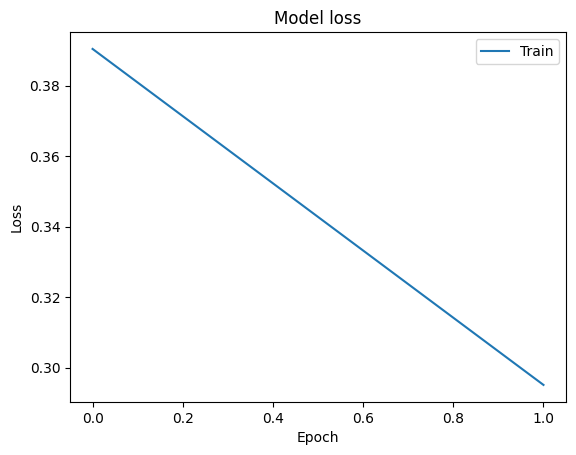

In [169]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

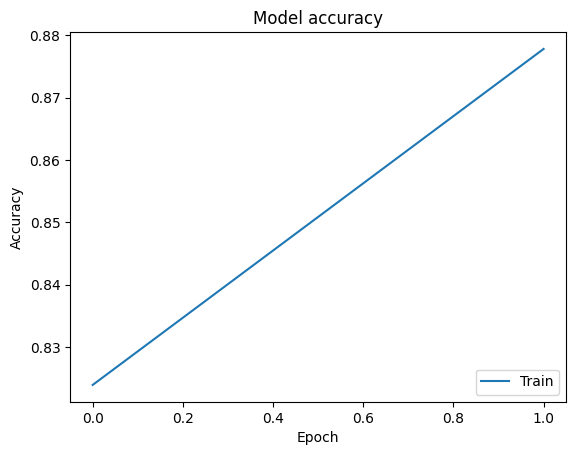

In [170]:
plt.plot(hist.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()